# Jamaica Fatality Data - 2015

## Description of the Problem
The goal of this project is to determine if fatal car crashes happen in more urban or rural areas. We will do this by examining the location of car crashes and the frequency by parish. Parish density will be pulled as a guideline to determine if this is considered urban or rural. 

## Description of Data and How it will be used to Solve the problem
The dataset for fatal car crashes in Jamaica is pulled from the government website at data.gov.jm. For population data, the website, citypopulation.de is used. This will be considered in ruling an area as rural or urban. 
Exclusions: Foursquare queries are excluded from this discussion

## Link to Github
This notebook is connected to GitHub

In [17]:
# import libraries
import numpy as np #library to handle data in a vectorized manner
import random #library for random number generation
import pandas as pd # library for process data as dataframes
import json #library to handle JSON files
import requests #library to handle requests

#Matlab imports
import matplotlib as pd #library to plot data
%matplotlib inline 
import matplotlib.cm as cm #for color maps
import matplotlib.colors as colors 

#Imports from SK Learn
from sklearn.cluster import KMeans #for clustering

# Conda Installs
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries imported!')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported!


## Import dataset from data.gov.jm

In [18]:
#import data on crashes by location from data.gov.jm website
import pandas as pd
df = pd.read_csv('https://data.gov.jm/sites/default/files/Fatalities%20by%20Parish.csv')
df.size

684

**Data Parsing for 2015 data**

In [19]:
#Get rows with years that are not 2015
row_delete = df[df['Year']!=2015].index

#Delete these rows from the dataframe
df.drop(row_delete, inplace=True)
df.pop('Year') #drop year since we are now only 2015
df

,Division,Fatal accidents,Fatalities
152,Clarendon,35,36
153,St. James,21,22
154,Hanover,18,21
155,Westmoreland,55,56
156,Manchester,16,17
157,St. Catherine South,23,23
158,St. Catherine North,26,27
159,St Andrew Central,21,23
160,St Andrew North,11,11
161,St Andrew South,20,24


In [20]:
#Check for geopy
!pip install geopy

from geopy.geocoders import Nominatim

In [21]:
# Getting the geographical coordinates of Jamaica
address = 'Jamaica'
geolocator = Nominatim(user_agent="jamaica_explorer")
location = geolocator.geocode(address)
lati = location.latitude
longi = location.longitude
print('The geographical coordinates of Jamaica are {}, {}.'.format(lati,longi))

The geographical coordinates of Jamaica are 18.1152958, -77.1598454610168.


Import files

In [22]:
# The code was removed by Watson Studio for sharing.

,Division,latitude,longitude
0,Clarendon,18.010756,-77.281373
1,St. James,18.378355,-77.839080
2,Hanover,18.397577,-78.159057
3,Westmoreland,18.268395,-78.178200
4,Manchester,18.012609,-77.494988


In [23]:
df2 = pd.merge(df,df_data_1)
df2.head()

,Division,Fatal accidents,Fatalities,latitude,longitude
0,Clarendon,35,36,18.010756,-77.281373
1,St. James,21,22,18.378355,-77.839080
2,Hanover,18,21,18.397577,-78.159057
3,Westmoreland,55,56,18.268395,-78.178200
4,Manchester,16,17,18.012609,-77.494988


In [24]:
df2.size

95

# Show Fatal accidents

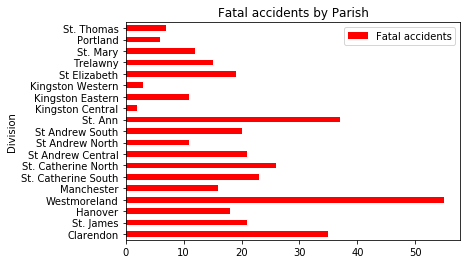

In [54]:
import matplotlib.pyplot as plt
df2.plot(kind='barh',x='Division',y='Fatal accidents',color='red')

plt.title('Fatal accidents by Parish')
plt.show()


## Create map and add markers

In [38]:
#marker locations for maps
locations = df2[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[18.053713000000002, -76.79209300000001]

In [55]:
import folium
import pandas as pd

#create empty map
map = folium.Map(location=[lati,longi], zoom_start=9)

#add markers to map
for point in range(0,len(locationlist)):
#    folium.Marker(locationlist[point],popup=df2['Division'][point]).add_to(map)
    folium.CircleMarker(
        locationlist[point],
        color='red',
        size=df2['Fatal accidents']
        ).add_to(map)

map

We can see that car crashes and population of division/ parish are not related.